# **Importing the Dataset**

In [2]:
pip install vpython

     |████████████████████████████████| 3.7 MB 4.2 MB/s 
     |████████████████████████████████| 365 kB 52.6 MB/s 
     |████████████████████████████████| 40 kB 756 kB/s 
     |████████████████████████████████| 3.6 MB 35.2 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 48.2 MB/s 
     |████████████████████████████████| 395 kB 57.3 MB/s 
     |████████████████████████████████| 129 kB 66.9 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
     |████████████████████████████████| 428 kB 26.1 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 192 kB 52.2 MB/s 
     |████████████████████████████████| 271 kB 65.8 MB/s 
     |████████████████████████████████| 160 kB 64.4 MB/s 
  Created wheel for autobahn: filename=autobahn-21.11.1-cp37-cp37m-linux_x86_64.whl size=537829 sha256=c7b28c0d82b86933cb759e9b192a4893a4e35b2314bfc5cac5445761336e2fa5
  Stored in directory: /root/

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

from IPython.display import display 


# display for notebooks , visualisation tool
%matplotlib inline


data = pd.read_csv('ASD.csv')
display(data.head(n=5))

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [5]:
# Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print( "Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print ("Individuals not diagonised with ASD: {}".format(n_asd_no))
print ("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 704
Individuals diagonised with ASD: 189
Individuals not diagonised with ASD: 515
Percentage of individuals diagonised with ASD: 26.85%


# Visualization with Seaborn

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

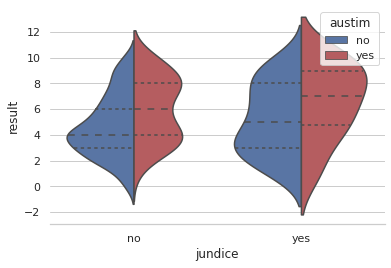

In [7]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="austim", data=data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

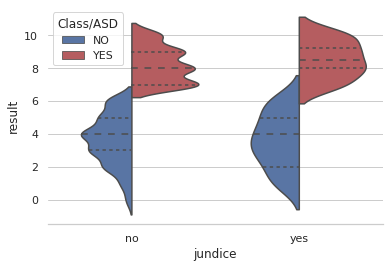

In [8]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

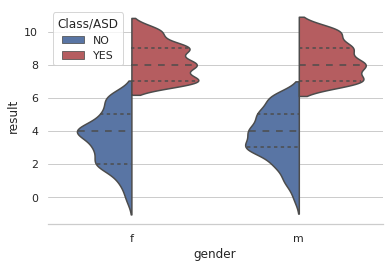

In [9]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


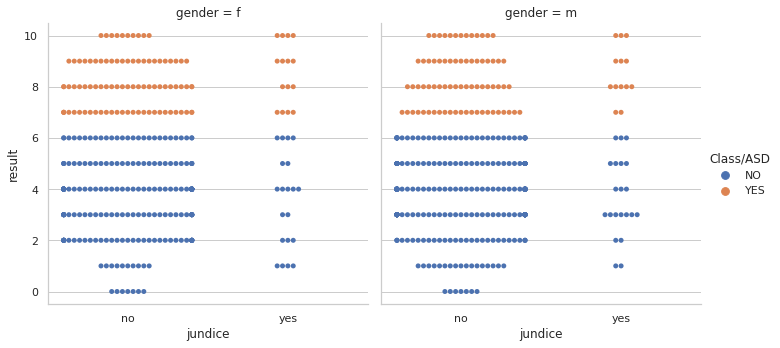

In [10]:
sns.factorplot(x="jundice", y="result", hue="Class/ASD", col="gender", data=data, kind="swarm");

# **Preparing Data**

In [11]:
asd_data = pd.read_csv('ASD.csv', na_values=['?'])
asd_data.head(n=5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO


In [12]:
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


# **Cleaning the dataset**

In [13]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
|(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
4,5,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO
12,13,0,1,1,1,1,1,0,0,1,0,17.0,f,NaN,no,no,Bahamas,no,6,18 and more,NaN,NO
13,14,1,0,0,0,0,0,1,1,0,1,17.0,m,NaN,no,no,Austria,no,4,18 and more,NaN,NO
14,15,1,0,0,0,0,0,1,1,0,1,17.0,f,NaN,no,no,Argentina,no,4,18 and more,NaN,NO
19,20,0,0,0,0,0,0,1,1,0,1,34.0,m,NaN,yes,no,United Arab Emirates,no,3,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,653,0,0,0,0,0,0,0,0,0,1,33.0,f,NaN,no,no,United States,no,1,18 and more,NaN,NO
658,659,0,0,1,1,0,0,1,0,0,0,43.0,m,NaN,no,no,Azerbaijan,no,3,18 and more,NaN,NO
659,660,1,1,1,1,1,1,0,0,1,1,44.0,m,NaN,no,no,Pakistan,no,8,18 and more,NaN,YES
666,667,0,0,0,0,0,0,0,1,0,0,56.0,m,NaN,no,no,Iraq,no,1,18 and more,NaN,NO


In [14]:
asd_data.dropna(inplace=True)
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,349.725780,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,5.077176
std,207.856238,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.287470,2.522717
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,329.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,533.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


Data types of all our features including the target feature. Moreover,  count the total number of instances and the target-class distribution.

In [15]:
# Reminder of the features:
print(asd_data.dtypes)


# Total number of records in clean dataset
n_records = len(asd_data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print ("Individuals not diagonised with ASD: {}".format(n_asd_no))

id                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result               int64
age_desc            object
relation            object
Class/ASD           object
dtype: object
Total number of records: 609
Individuals diagonised with ASD: 180
Individuals not diagonised with ASD: 429


*Next*  we convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. We create an array that extracts only the feature data we want to work with and another array that contains the classes (class/ASD).

In [16]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

Some of our models require the input data to be normalized, normalize the attribute data. Here, I use preprocessing.MinMaxScaler().

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
5,0.051913,m,Others,yes,no,United States,0.9,Self,1,1,1,1,1,0,1,1,1,1


# **One-Hot-Coding**

In [18]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender_f,gender_m,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,jundice_no,jundice_yes,austim_no,austim_yes,contry_of_res_Afghanistan,contry_of_res_AmericanSamoa,contry_of_res_Angola,contry_of_res_Armenia,contry_of_res_Aruba,contry_of_res_Australia,contry_of_res_Austria,contry_of_res_Bahamas,contry_of_res_Bangladesh,contry_of_res_Belgium,contry_of_res_Bolivia,...,contry_of_res_Iceland,contry_of_res_India,contry_of_res_Indonesia,contry_of_res_Iran,contry_of_res_Ireland,contry_of_res_Italy,contry_of_res_Jordan,contry_of_res_Malaysia,contry_of_res_Mexico,contry_of_res_Nepal,contry_of_res_Netherlands,contry_of_res_New Zealand,contry_of_res_Nicaragua,contry_of_res_Niger,contry_of_res_Oman,contry_of_res_Pakistan,contry_of_res_Philippines,contry_of_res_Portugal,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Saudi Arabia,contry_of_res_Serbia,contry_of_res_Sierra Leone,contry_of_res_South Africa,contry_of_res_Spain,contry_of_res_Sri Lanka,contry_of_res_Sweden,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,0.6,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.019126,0.5,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.027322,0.8,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.049180,0.6,1,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,0.051913,0.9,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


94 total features after one-hot encoding.
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_res_Costa Rica', 'contry_of_res_Cyprus', 'contry_of_res_Czech Republic', 'con

Text(0, 0.5, 'Frequency')

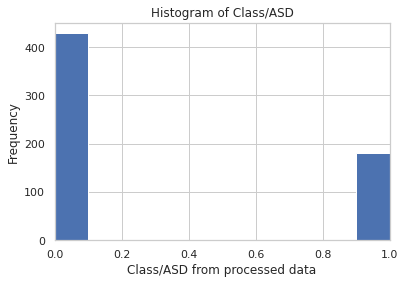

In [19]:
# histogram of Class/ASD
from matplotlib import pyplot as plt
# 8 bins
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

# **Shuffle and Split Data**

In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
#asd_data

Training set has 487 samples.
Testing set has 122 samples.


# **Models**

## **1.Decision tree**

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Depiction of Decision Tree algorithm

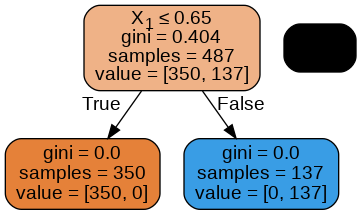

In [22]:
import pydotplus 


dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 
Image(graph.create_png()) 

# **Evaluating Model Performance**

In [23]:
# make class predictions for the testing set
y_pred_class = dectree.predict(X_test)

In [24]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0]
False: [1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0]


Confusion matrix

In [25]:
from sklearn import metrics
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[79  0]
 [ 0 43]]


Classification Accuracy

In [26]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

1.0


Classification Error:

In [27]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.0


Sensitivity:

In [28]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

1.0
1.0


Specificity:

In [29]:
specificity = TN / (TN + FP)

print(specificity)

1.0


False Positive Rate:

In [30]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.0


Precision:

In [31]:
precision = TP / float(TP + FP)

#print(precision)
print(metrics.precision_score(y_test, y_pred_class))

1.0


### Visualizing the classification prediction:

In [32]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
dectree.predict(X_test)[0:10]

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [33]:
# print the first 10 predicted probabilities of class membership
dectree.predict_proba(X_test)[0:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [34]:
# store the predicted probabilities for class 1
y_pred_prob = dectree.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1.]


Text(0, 0.5, 'Frequency')

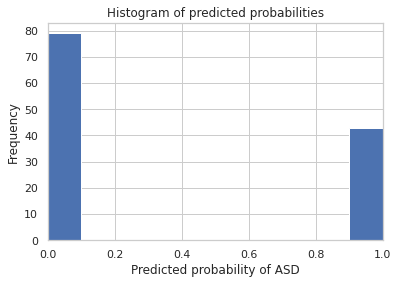

In [35]:
# allow plots to appear in the notebook

import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of ASD')
plt.ylabel('Frequency')

\# **Receiver Operating Characteristic (ROC) Curves**

[1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1]
[1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1.]
[0. 0. 1.]
[0. 1. 1.]
[2. 1. 0.]


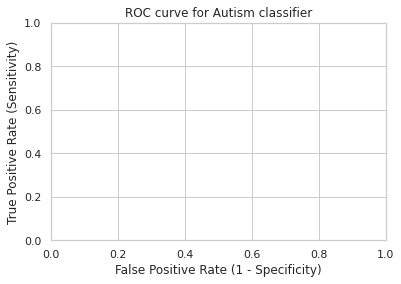

In [36]:

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
y_t = np.array(y_test)
print(y_t)
print(y_pred_prob)


fpr, tpr, thresholds = metrics.roc_curve(y_t, y_pred_prob)

print(fpr)
print(tpr)
print(thresholds)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Autism classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Score metric for Model performance

In [37]:
dectree.score(X_test, y_test)

1.0

Cross-validation:

In [38]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0


AUC Score:

In [39]:
# calculate cross-validated AUC
from sklearn.model_selection import train_test_split
cross_val_score(dectree, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

F-beta Score:

In [40]:
dectree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

## **2.Random Forest**

RandomForestClassifier instead to see whether it performs better.

In [41]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9933333333333334

AUC Score: 

In [42]:
# calculate cross-validated AUC
from sklearn.model_selection import train_test_split
cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9988095238095237

F-beta Score:

In [43]:
ranfor.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

## **3.SVM**

In [44]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [45]:
cv_scores = cross_val_score(svc, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

AUC Score:

In [46]:
# calculate cross-validated AUC
from sklearn.model_selection import train_test_split
cross_val_score(svc, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

F-beta Score:

In [47]:
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

## **4.K-Nearest-Neighbors (KNN)**

In [48]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)

cv_scores.mean()

0.9474590163934427

AUC Score:

In [49]:
# calculate cross-validated AUC
from sklearn.model_selection import train_test_split
cross_val_score(knn, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9930740125507567

F-beta Score:

In [50]:
knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9360730593607306

Choosing K is treachreous, so we iterate through different values of K. Hence we write a for loop to run KNN with K values ranging from 10 to 50 and see if K makes a substantial difference.

> Indented block



In [51]:
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)
    print (n, cv_scores.mean())

10 0.9474590163934427
11 0.9507377049180328
12 0.9507377049180328
13 0.9556830601092896
14 0.9507650273224044
15 0.944207650273224
16 0.9507650273224044
17 0.9507377049180328
18 0.9523770491803278
19 0.9540163934426229
20 0.9523770491803278
21 0.9523770491803278
22 0.9474590163934424
23 0.9490983606557375
24 0.9507377049180326
25 0.9507377049180328
26 0.9523770491803278
27 0.9507377049180328
28 0.9507377049180326
29 0.9507377049180328
30 0.9523770491803278
31 0.9474863387978143
32 0.9491256830601094
33 0.9474863387978143
34 0.9507650273224044
35 0.9491256830601094
36 0.9491256830601091
37 0.9507650273224044
38 0.9540710382513661
39 0.9524316939890708
40 0.9540710382513659
41 0.9524316939890708
42 0.9524316939890708
43 0.9507923497267757
44 0.9507923497267757
45 0.9507923497267757
46 0.9524316939890708
47 0.9524316939890708
48 0.9540710382513661
49 0.9524316939890708


## **5.Naive Bayes**

In [55]:
from sklearn.naive_bayes import MultinomialNB

#scaler = preprocessing.MinMaxScaler()
#all_features_minmax = scaler.fit_transform(all_features)

nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_classes, cv=10)

cv_scores.mean()

0.885

AUC Score: 

In [56]:
# calculate cross-validated AUC
from sklearn.model_selection import train_test_split
cross_val_score(nb, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9445090439276485

F-beta Score:

In [57]:
nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.8370044052863436

## **6.Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9934426229508198

AUC Score: 

In [59]:
# calculate cross-validated AUC
from sklearn.model_selection import train_test_split
cv_scores_roc = cross_val_score(logreg, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

1.0

F-beta Score:

In [60]:
logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9641255605381165

# **Model Tuning**

In [61]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split


def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)


# TODO: Initialize the classifier
clf = SVC(random_state = 1)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9590
F-score on testing data: 0.9361

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


# Extracting Feature Importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 1.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
F

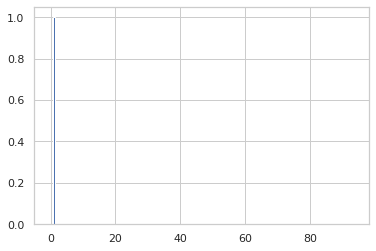

In [67]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

from sklearn.datasets import make_classification

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()
# Plot


Feature: 0, Score: 0.00000
Feature: 1, Score: 1.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

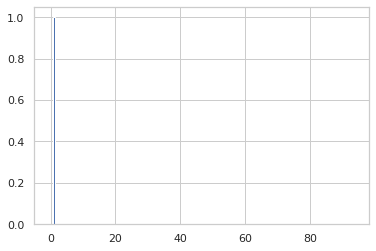

In [68]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()
# Plot


\\# Building a MLP model architecture

In [ ]:
# Imports
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


np.random.seed(42)

In [ ]:
# Building the model architecture with one layer of length 4


model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 94))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 760       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_test, y_test), 
          verbose=2)

Epoch 1/100
31/31 - 1s - loss: 0.6832 - accuracy: 0.7002 - val_loss: 0.6784 - val_accuracy: 0.6475 - 1s/epoch - 36ms/step
Epoch 2/100
31/31 - 0s - loss: 0.6595 - accuracy: 0.7269 - val_loss: 0.6581 - val_accuracy: 0.6475 - 64ms/epoch - 2ms/step
Epoch 3/100
31/31 - 0s - loss: 0.6278 - accuracy: 0.7228 - val_loss: 0.6314 - val_accuracy: 0.6475 - 61ms/epoch - 2ms/step
Epoch 4/100
31/31 - 0s - loss: 0.5947 - accuracy: 0.7331 - val_loss: 0.6027 - val_accuracy: 0.6639 - 76ms/epoch - 2ms/step
Epoch 5/100
31/31 - 0s - loss: 0.5575 - accuracy: 0.7372 - val_loss: 0.5687 - val_accuracy: 0.6967 - 69ms/epoch - 2ms/step
Epoch 6/100
31/31 - 0s - loss: 0.5210 - accuracy: 0.7803 - val_loss: 0.5352 - val_accuracy: 0.7295 - 65ms/epoch - 2ms/step
Epoch 7/100
31/31 - 0s - loss: 0.4795 - accuracy: 0.8234 - val_loss: 0.4982 - val_accuracy: 0.7623 - 74ms/epoch - 2ms/step
Epoch 8/100
31/31 - 0s - loss: 0.4451 - accuracy: 0.8296 - val_loss: 0.4591 - val_accuracy: 0.8443 - 73ms/epoch - 2ms/step
Epoch 9/100
31/31

# Evaluating the model

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("\n Testing accuracy: ", score[1])

16/16 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9979

 Training Accuracy: 0.9979466199874878

 Testing accuracy:  0.9754098653793335


## **Conclusion**

Rebuilding the model without the 'result' variable.

In [69]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,United States,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,United States,Self,1,1,0,1,0,0,1,1,0,1
5,0.051913,m,Others,yes,no,United States,Self,1,1,1,1,1,0,1,1,1,1


In [70]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender_f,gender_m,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,jundice_no,jundice_yes,austim_no,austim_yes,contry_of_res_Afghanistan,contry_of_res_AmericanSamoa,contry_of_res_Angola,contry_of_res_Armenia,contry_of_res_Aruba,contry_of_res_Australia,contry_of_res_Austria,contry_of_res_Bahamas,contry_of_res_Bangladesh,contry_of_res_Belgium,contry_of_res_Bolivia,contry_of_res_Brazil,...,contry_of_res_Iceland,contry_of_res_India,contry_of_res_Indonesia,contry_of_res_Iran,contry_of_res_Ireland,contry_of_res_Italy,contry_of_res_Jordan,contry_of_res_Malaysia,contry_of_res_Mexico,contry_of_res_Nepal,contry_of_res_Netherlands,contry_of_res_New Zealand,contry_of_res_Nicaragua,contry_of_res_Niger,contry_of_res_Oman,contry_of_res_Pakistan,contry_of_res_Philippines,contry_of_res_Portugal,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Saudi Arabia,contry_of_res_Serbia,contry_of_res_Sierra Leone,contry_of_res_South Africa,contry_of_res_Spain,contry_of_res_Sri Lanka,contry_of_res_Sweden,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.019126,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.027322,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.049180,1,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,0.051913,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


93 total features after one-hot encoding.
['age', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Chile', 'contry_of_res_China', 'contry_of_res_Costa Rica', 'contry_of_res_Cyprus', 'contry_of_res_Czech Republic', 'contry_of_res

In [71]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 487 samples.
Testing set has 122 samples.


In [72]:
### (1) Decision Trees

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

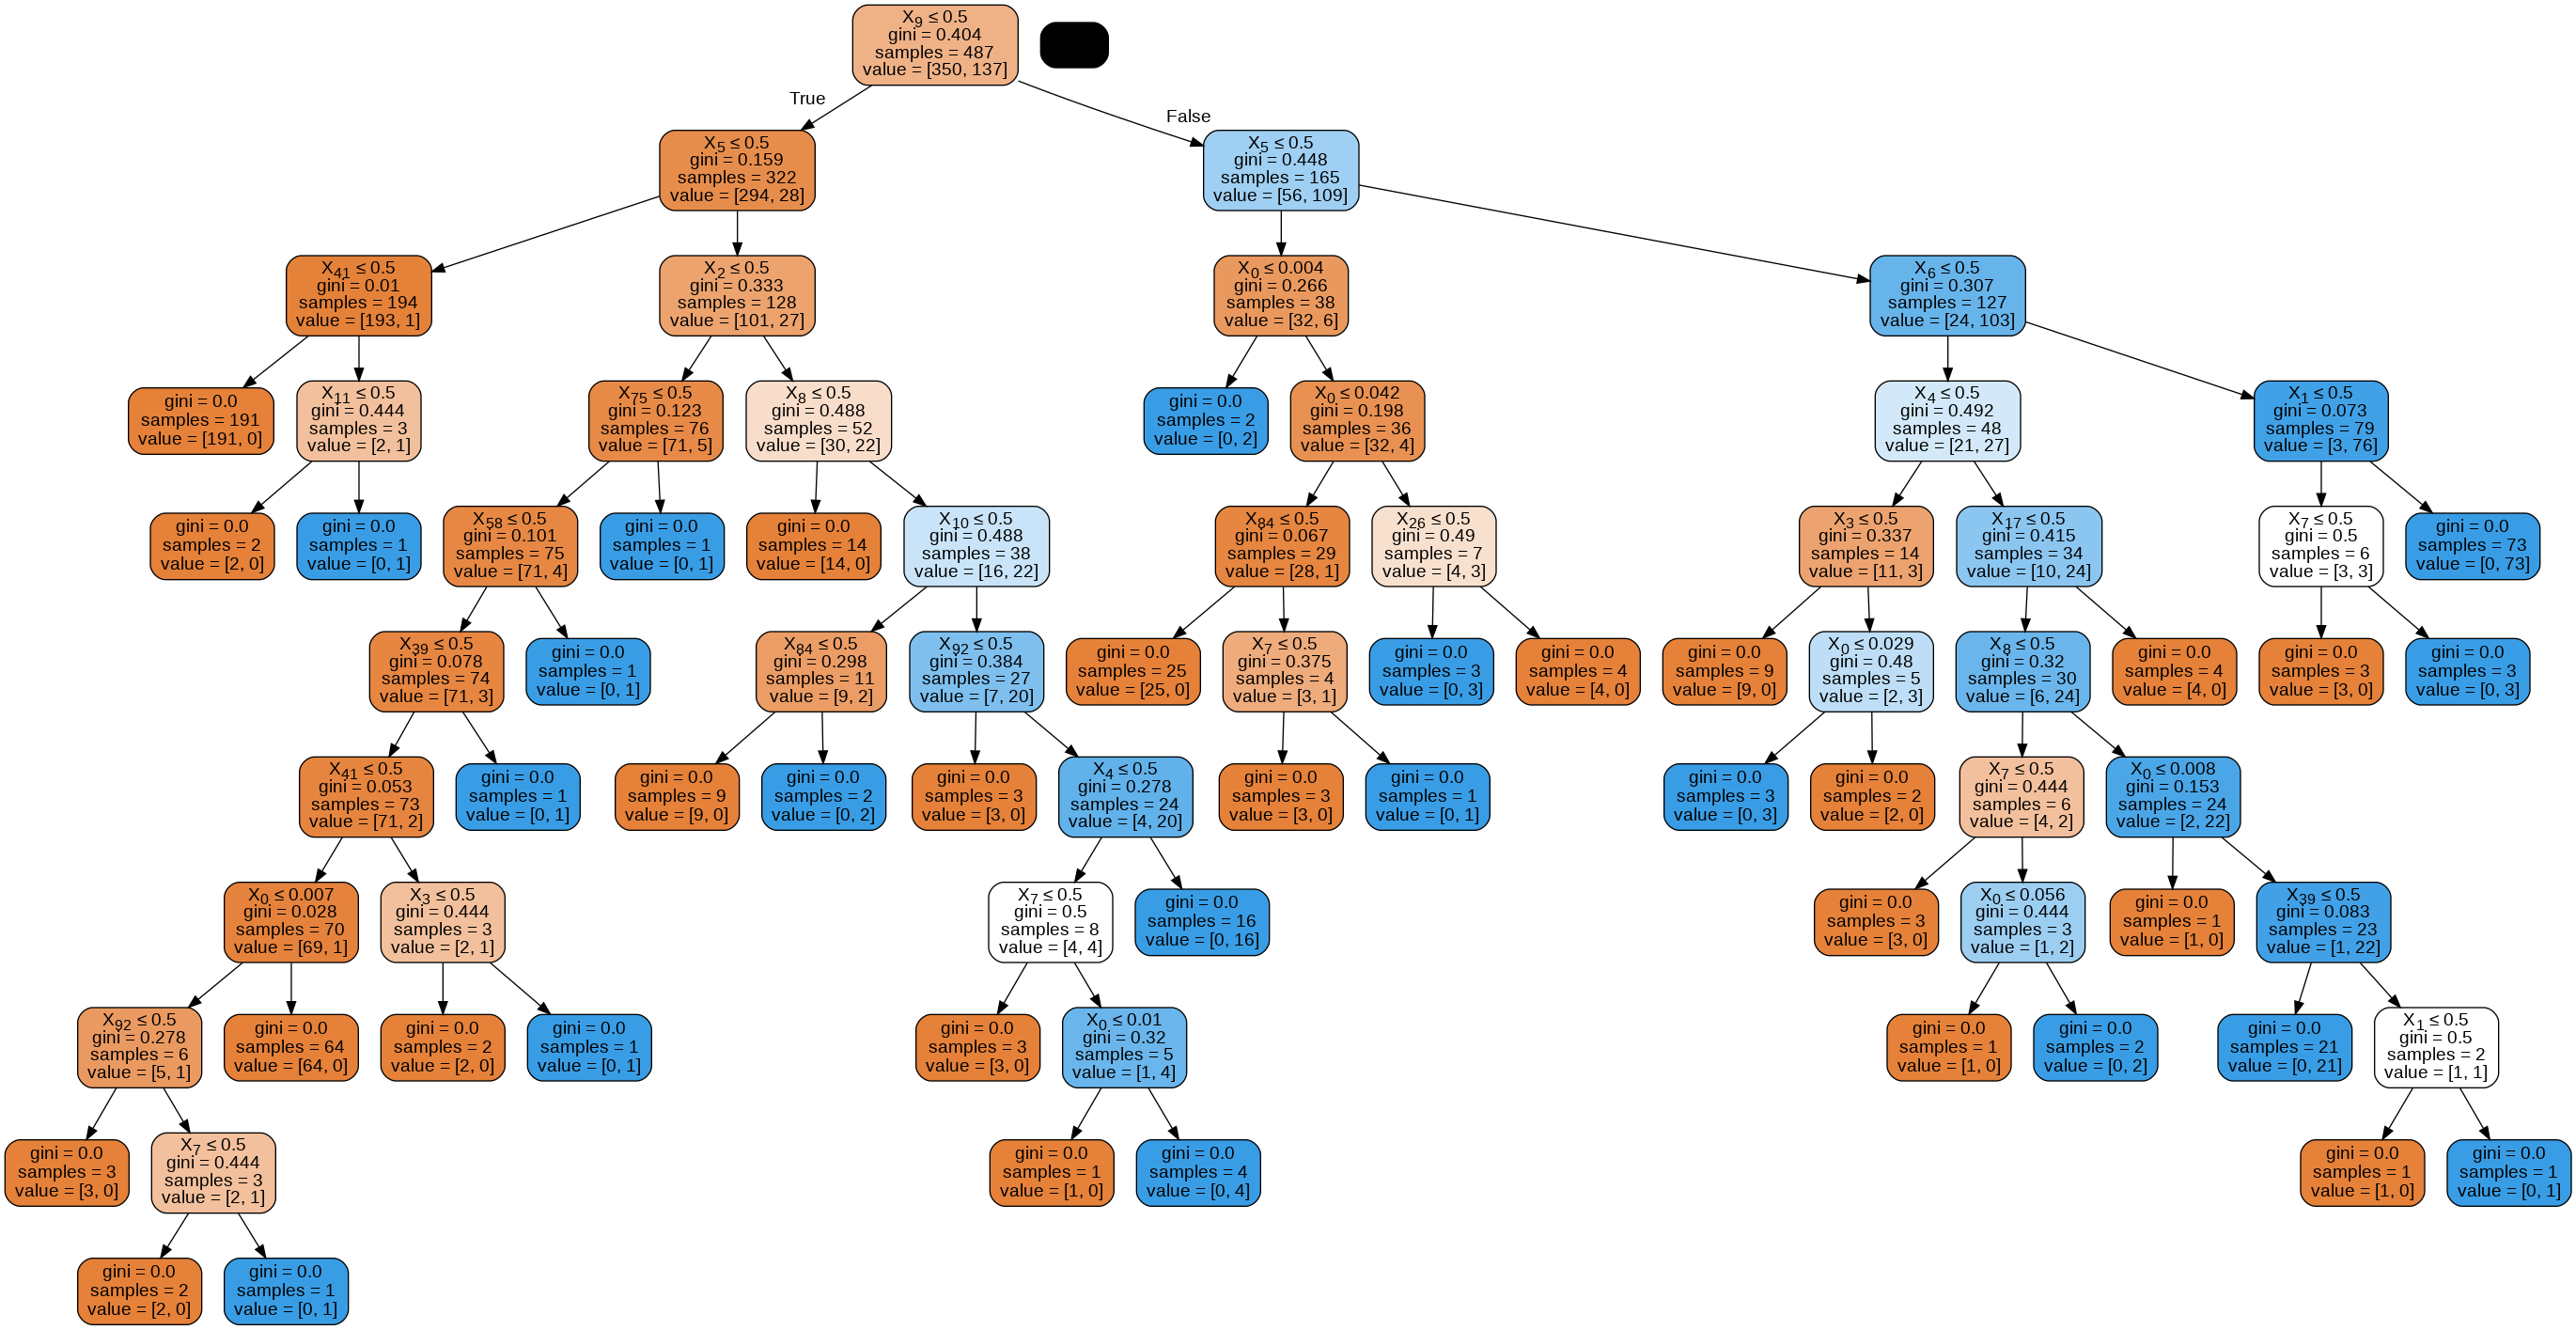

In [73]:
import pydotplus 


dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 
Image(graph.create_png()) 

In [74]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, features_final, asd_classes, cv=10)

cv_scores.mean()

0.8866939890710382

In [75]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)

cv_scores.mean()

0.912896174863388

In [76]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)

cv_scores.mean()

0.9327049180327869

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.10000
Feature: 2, Score: 0.10000
Feature: 3, Score: 0.10000
Feature: 4, Score: 0.10000
Feature: 5, Score: 0.08000
Feature: 6, Score: 0.10000
Feature: 7, Score: 0.10000
Feature: 8, Score: 0.10000
Feature: 9, Score: 0.10000
Feature: 10, Score: 0.08000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.02000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.02000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

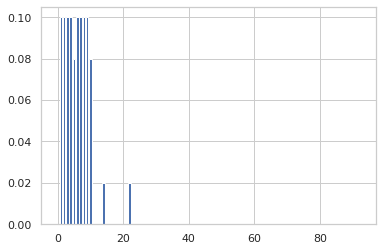

In [78]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_


for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()
